## Perturbed DG Experiments - Exponential Toy Game
#### On Duality Gap as a Measure for Monitoring GAN Training
---

This Notebook Contains the Code for the experiments and visualization pertaining perturbed DG over the exponential toy game.

---

### Imports

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from sympy import symbols, Matrix, Function, simplify, exp, hessian, solve, init_printing
from sympy import Symbol, solve, Derivative,pprint
from math import exp,pow
from sympy import *
import sympy
from sympy.solvers.solveset import nonlinsolve

### Function Definition

In [8]:
def exp_minmax_loss_fxn(x,y):
    a = -0.01
    b = 0.3
    c = 0.5
    f = tf.math.exp(a*(x**2 + y**2))*((b*(x**2) + y)**2 + (c*(y**2) + x)**2) 
    return f

### Function Visualization

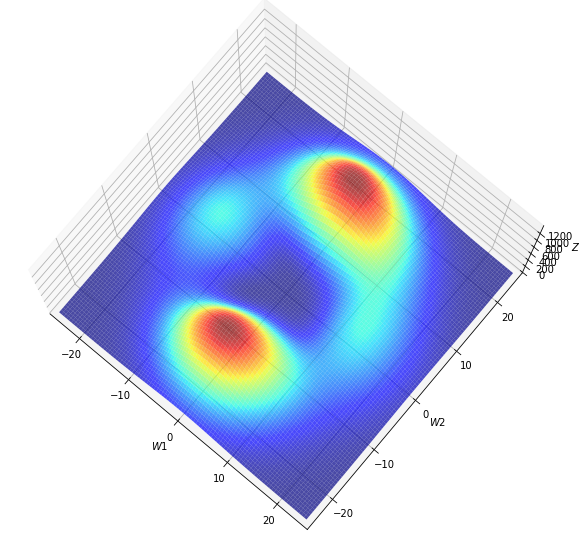

In [9]:
def show_exp_minmax_loss_fxn():

    fig = plt.figure(figsize=(10, 10))

    w1_min, w1_max, w1_step = -25.0, 25.0, 0.5
    w2_min, w2_max, w2_step = -25.0, 25.0, 0.5
    W1, W2 = np.meshgrid(np.arange(w1_min, w1_max+ w1_step, w1_step), np.arange(w2_min, w2_max+ w2_step, w2_step))
    Z = exp_minmax_loss_fxn(W1, W2 )

    ax = plt.axes(projection='3d', elev=80, azim=-50)
    ax.set_xlim((w1_min, w1_max))
    ax.set_ylim((w2_min, w2_max))
    
   
    ax.plot_surface(W1, W2, Z, rstride=1, cstride=1, edgecolor='none', alpha=.7, cmap=plt.cm.jet)
    ax.set_xlabel('$W1$')
    ax.set_ylabel('$W2$')
    ax.set_zlabel('$Z$')
    plt.savefig('exp_minmax_fxn.png')
    plt.show()
    
show_exp_minmax_loss_fxn()

### Gradient and Hessian Computation

In [10]:
init_printing()

a = -0.01
b = 0.3
c = 0.5

x1, x2 = symbols('x1 x2')
f, g, h = symbols('f g h', cls=Function)

X = Matrix([x1,x2])
f = Matrix([exp(-0.01*(x1**2 + x2**2))*((0.3*(x1**2)+x2)**2 + (0.5*(x2**2)+x1)**2)])


In [11]:

gradf = simplify(f.jacobian(X))
gradf

⎡⎛                                ⎛              2                 2⎞         
⎢⎜       ⎛      2     ⎞           ⎜⎛           2⎞    ⎛      2     ⎞ ⎟         
⎣⎝1.2⋅x₁⋅⎝0.3⋅x₁  + x₂⎠ - 0.02⋅x₁⋅⎝⎝x₁ + 0.5⋅x₂ ⎠  + ⎝0.3⋅x₁  + x₂⎠ ⎠ + 2⋅x₁ +

        ⎞           2          2  ⎛                                          ⎛
       2⎟  - 0.01⋅x₁  - 0.01⋅x₂   ⎜      2          ⎛           2⎞           ⎜
 1.0⋅x₂ ⎠⋅ℯ                       ⎝0.6⋅x₁  + 2.0⋅x₂⋅⎝x₁ + 0.5⋅x₂ ⎠ - 0.02⋅x₂⋅⎝

              2                 2⎞       ⎞           2          2⎤
⎛           2⎞    ⎛      2     ⎞ ⎟       ⎟  - 0.01⋅x₁  - 0.01⋅x₂ ⎥
⎝x₁ + 0.5⋅x₂ ⎠  + ⎝0.3⋅x₁  + x₂⎠ ⎠ + 2⋅x₂⎠⋅ℯ                     ⎦

In [12]:

hessianf = simplify(hessian(f, X))
hessianf

⎡⎛           ⎛              2                 2⎞                              
⎢⎜         2 ⎜⎛           2⎞    ⎛      2     ⎞ ⎟          2           ⎛       
⎢⎝0.0004⋅x₁ ⋅⎝⎝x₁ + 0.5⋅x₂ ⎠  + ⎝0.3⋅x₁  + x₂⎠ ⎠ + 1.08⋅x₁  - 0.04⋅x₁⋅⎝1.2⋅x₁⋅
⎢                                                                             
⎢⎛             ⎛              2                 2⎞                            
⎢⎜             ⎜⎛           2⎞    ⎛      2     ⎞ ⎟           ⎛      2         
⎣⎝0.0004⋅x₁⋅x₂⋅⎝⎝x₁ + 0.5⋅x₂ ⎠  + ⎝0.3⋅x₁  + x₂⎠ ⎠ - 0.02⋅x₁⋅⎝0.6⋅x₁  + 2.0⋅x₂

                                                               2              
⎛      2     ⎞                2⎞                 ⎛           2⎞         ⎛     
⎝0.3⋅x₁  + x₂⎠ + 2⋅x₁ + 1.0⋅x₂ ⎠ + 1.2⋅x₂ - 0.02⋅⎝x₁ + 0.5⋅x₂ ⎠  - 0.02⋅⎝0.3⋅x
                                                                              
                                                                              
 ⎛           2⎞       ⎞                    ⎛       

In [13]:
def get_jacobian(val_x=0,val_y=0):
  x = Symbol('x')
  y = Symbol('y')
  f1 = -sympy.exp(a*(x**2 + y**2))*((b*(x**2) + y)**2 + (c*(y**2) + x)**2) 
  f2 = sympy.exp(a*(x**2 + y**2))*((b*(x**2) + y)**2 + (c*(y**2) + x)**2) 

  d1 = Derivative(f1,x).doit()
  d2 = Derivative(f2,y).doit()

  print( ' Gradients : ',d1.subs(x,val_x).subs(y,val_y),' \t ',d2.subs(x,val_x).subs(y,val_y))
  d11 = Derivative(d1,x).doit()
  d22 = Derivative(d2,y).doit()

  d12 = Derivative(d1,y).doit()
  d21 = Derivative(d2,x).doit()

  Jacobian = Matrix([[d11.subs(x,val_x).subs(y,val_y),d12.subs(x,val_x).subs(y,val_y)],[d21.subs(x,val_x).subs(y,val_y),d22.subs(x,val_x).subs(y,val_y)]])

  print( ' Jacobian : \n')
  pprint(Jacobian)
  eigenVals = Jacobian.eigenvals()

  expanded_eigenvals = [complex(key) for key in eigenVals.keys() for i in range(eigenVals[key]) ]
  print('\n\n EigenValues : \n\n {}'.format(expanded_eigenvals))
  return expanded_eigenvals


In [14]:

init_points = [(-12.467547,-8.67366),(0.0,0.0)]

for x,y in init_points:
    print('--'*50 +'\n \t Init Point : X:{} Y:{} \n'.format(x,y)+'--'*50)
    eigenvals = get_jacobian(x,y)
    eigenvals = [np.array([complex(item) for item in eigenvals])]

----------------------------------------------------------------------------------------------------
 	 Init Point : X:-12.467547 Y:-8.67366 
----------------------------------------------------------------------------------------------------
 Gradients :  0.0620581635165252  	  -0.0683054521266797
 Jacobian : 

⎡1.11718768601266   12.1764191162642⎤
⎢                                   ⎥
⎣-12.1764191162642  9.82599396907192⎦


 EigenValues : 

 [(5.47159082754229-11.371207313911825j), (5.47159082754229+11.371207313911825j)]
----------------------------------------------------------------------------------------------------
 	 Init Point : X:0.0 Y:0.0 
----------------------------------------------------------------------------------------------------
 Gradients :  0  	  0
 Jacobian : 

⎡-2  0⎤
⎢     ⎥
⎣0   2⎦


 EigenValues : 

 [(-2+0j), (2+0j)]


In [15]:

import tqdm
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers,models
import time
import math
from math import ceil
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from numpy import asarray

EPOCHS = 15 
alpha=0.95 
decay=0.95
B=tf.Variable(0.0)
duality_gap_batch=tf.Variable(0.0)
acc_Y_cost=tf.Variable(0.0)
acc_X_cost=tf.Variable(0.0) 
num_batches=1


class TAU(object):
    def __init__(self, x=-5.0,y=-10.0,optimizer='adam'):
        self.X = tf.Variable(x)
        self.Y = tf.Variable(y)
        
        print( self.X, self.Y)

        self.lr = 5e-3

        self.gradients_of_X=-1
        self.gradients_of_Y=-1
      
        self.Y_loss=-1
        self.X_loss=-1
        
        if(optimizer=='adam'):
            self.optimizer='adam'
            self.X_optimizer=tf.keras.optimizers.Adam(self.lr)
            self.Y_optimizer=tf.keras.optimizers.Adam(self.lr)
        elif(optimizer=='sgd'):
            self.optimizer='sgd'
            self.X_optimizer=tf.keras.optimizers.SGD(self.lr)
            self.Y_optimizer=tf.keras.optimizers.SGD(self.lr)
        
        self.update_X_list = []
        self.update_Y_list = []

    def show_contour(self,epoch=0,reward=0):
      fig, ax = plt.subplots(figsize=(10, 6))
      w1_min, w1_max, w1_step = -26.0, 26.0, 0.2
      w2_min, w2_max, w2_step = -26.0, 26.0, 0.2
      W1, W2 = np.meshgrid(np.arange(w1_min, w1_max+ w1_step, w1_step), np.arange(w2_min, w2_max+ w2_step, w2_step))
      Z = exp_minmax_loss_fxn(W1, W2 )
      cs = ax.contourf(W1, W2, Z, cmap=plt.cm.Greys ,alpha=0.6)
    
      
      ax.plot( self.update_X_list, self.update_Y_list, color='g',linewidth=2.0,label='Autoloss')
      ax.scatter( [-12,-11,12], [-9,7,-7], color='b',linewidth=2.0,label='Nash',marker='x')
      ax.scatter( [-.5], [-1], color='r',linewidth=2.0,label='Non Nash',marker='*')
    
      cbar = fig.colorbar(cs)
      leg = plt.legend()
      ax.set_xlabel('$X$')
      ax.set_ylabel('$Y$')
      plt.title('Iteration : {} Reward : {} DualityGAP :{}'.format(epoch,reward,duality_gap_batch.numpy()))
      plt.xticks(np.arange(w1_min, w1_max+5, 5.0))
      plt.yticks(np.arange(w2_min, w2_max+5, 5.0))
      ax.set_xlim((w1_min, w1_max))
      ax.set_ylim((w2_min, w2_max))
      plt.grid()
      plt.show()
        
    def calculate_duality_gap(self,random=False):
      
      stddev = 0.01
      self.update_X_list.append(self.X.numpy())
      self.update_Y_list.append(self.Y.numpy())
    
      self.update_X_list_dg = []
      self.update_Y_list_dg = []

      self.update_X_list_dg.append(self.X.numpy())
      self.update_Y_list_dg.append(self.Y.numpy())

      if(random==True):
        X = tf.Variable(self.X.numpy())
        Y = tf.Variable(self.Y.numpy()+ abs(tf.random.normal(mean=1.0, stddev=stddev,shape=self.Y.numpy().shape)))
      else:
        X = tf.Variable(self.X.numpy())
        Y = tf.Variable(self.Y.numpy())

      iterations = 500
      lr = 5e-4

      if(self.optimizer=='adam'):
            X_optimizer=tf.keras.optimizers.Adam(self.lr)
            Y_optimizer=tf.keras.optimizers.Adam(self.lr)
      elif(self.optimizer=='sgd'):
            X_optimizer=tf.keras.optimizers.SGD(self.lr)
            Y_optimizer=tf.keras.optimizers.SGD(self.lr)

      for iteration in range(iterations):
        with tf.GradientTape() as Y_tape:    
          Y_tape.watch(Y)        
          Y_loss = exp_minmax_loss_fxn(X,Y)
        gradients_of_Y = Y_tape.gradient(Y_loss, Y)
      #         Y = Y - lr*gradients_of_Y
        Y_optimizer.apply_gradients(zip([gradients_of_Y],[Y]))
       
        if(iteration%5==0):
            self.update_Y_list_dg.append(Y.numpy())
            self.update_X_list.append(X.numpy())

      fmin = exp_minmax_loss_fxn(X,Y).numpy()
      
      if(random==True):
        X = tf.Variable(self.X.numpy()+ abs(tf.random.normal(mean=0.0,stddev=stddev,shape=self.X.numpy().shape)))
        Y = tf.Variable(self.Y.numpy())
      else:
        X = tf.Variable(self.X.numpy())
        Y = tf.Variable(self.Y.numpy())

      for iteration in range(iterations):
        with tf.GradientTape() as X_tape:       
          X_tape.watch(X)     
          X_loss = -1*exp_minmax_loss_fxn(X,Y)
        gradients_of_X = X_tape.gradient(X_loss, X)
      #         X = X - lr*gradients_of_X
        X_optimizer.apply_gradients(zip([gradients_of_X],[X]))
        
        if(iteration%5==0):
          self.update_X_list_dg.append(X.numpy())
          self.update_Y_list.append(Y.numpy())

      fmax = exp_minmax_loss_fxn(X,Y).numpy()

      print('Duality Gap Random : ',random,' : ',fmax - fmin)
      return fmax - fmin

      
    def train_step_Y(self):
        with tf.GradientTape() as Y_tape:     
            Y_tape.watch(self.Y)      
            self.Y_loss = exp_minmax_loss_fxn(self.X,self.Y)

        self.gradients_of_Y = Y_tape.gradient(self.Y_loss,self.Y)
        self.Y_optimizer.apply_gradients(zip([self.gradients_of_Y],[self.Y]))

        return self.gradients_of_Y,self.Y_loss
        
    def train_step_X(self):   
        with tf.GradientTape() as X_tape:            
            X_tape.watch(self.X)      
            self.X_loss = -1*exp_minmax_loss_fxn(self.X,self.Y)

        self.gradients_of_X = X_tape.gradient(self.X_loss, self.X)
        self.X_optimizer.apply_gradients(zip([self.gradients_of_X],[self.X]))
        
        return self.gradients_of_X,self.X_loss


    def train(self,action,epoch,i): 
      
        if action[0]==1:
            self.gradients_of_Y,self.Y_loss=self.train_step_Y()

        else:
            self.gradients_of_X,self.X_loss=self.train_step_X()

        if(epoch%5==0):
            self.update_X_list.append(self.X.numpy())
            self.update_Y_list.append(self.Y.numpy())


class Controller():
      def __init__(self,epoch=500):
          self.epoch = epoch

      def compute_dg(self,x,y,opt):
          tau = TAU(x,y,opt)

          data = {}
          vanilla_dg = tau.calculate_duality_gap(random=False)
          updates = {
                'X':tau.update_X_list,
                'Y':tau.update_Y_list,
                'X_DG':tau.update_X_list_dg,
                'Y_DG':tau.update_Y_list_dg,
                'DG':vanilla_dg
            }
          data['vanilla']=updates
          
          tau = TAU(x,y,opt)
          random_dg = tau.calculate_duality_gap(random=True)
          updates = {
                'X':tau.update_X_list,
                'Y':tau.update_Y_list,
                'X_DG':tau.update_X_list_dg,
                'Y_DG':tau.update_Y_list_dg,
                'DG':random_dg
            }
          data['random']=updates

          print('Vanilla DG : {} \nLocal Random DG  : {}'.format(vanilla_dg,random_dg))
          print('Final Coordinates : ' ,tau.update_X_list_dg[-1],tau.update_Y_list_dg[-1])
          updates = {
                'X':tau.update_X_list,
                'Y':tau.update_Y_list,
                'X_DG':tau.update_X_list_dg,
                'Y_DG':tau.update_Y_list_dg,
                'vanilla_DG':vanilla_dg,
                'local_random_DG':random_dg
            }
          print(data)
          return data
        
        
      def train_on_ratio(self,x=-12.87,y=-7.31,nx=1,ny=1,k=1,opt='adam'):
            tau = TAU(x,y,opt)

            for epoch in tqdm.tqdm(range(k*self.epoch)):
              for i in range(nx):
                  tau.train([0,1],epoch,i)

              for i in range(ny):
                  tau.train([1,0],epoch,i)
                
            updates = {
                'X':tau.update_X_list,
                'Y':tau.update_Y_list,
                'DG':tau.calculate_duality_gap()
            }
            print(tau.update_X_list,'\n',tau.update_Y_list)
            return updates
        
      def train_on_random_ratio(self,x=-5.1,y=-10.1,opt='adam'):
            tau = TAU(x,y,opt)
            max_iter = 20
            min_iter = 1
            
            nx = np.random.random_integers(min_iter,max_iter+1)
            ny = np.random.random_integers(min_iter,max_iter+1)
            
            for epoch in tqdm.tqdm(range(self.epoch)):
              for i in range(nx):
                  tau.train([0,1],epoch,i)

              for i in range(ny):
                  tau.train([1,0],epoch,i)
                   
                
            updates = {
                'X' :tau.update_X_list,
                'Y' :tau.update_Y_list
                # 'DG':tau.calculate_duality_gap()
            }
            return updates,nx+ny


controller=Controller(5000)
controller.train_on_ratio()
optimizers = ['adam']
final_dat = {}

init_points = [(0.0,0.0),( -12.467547,-8.67366)]

ntrials = 5

for opt in optimizers:
    print(opt)
    data={
        'single':{},
        'random':{}
    }
    for x,y in init_points:
        print(x,y)

        trials = []
        # data['random']['X:{},Y:{}'.format(x,y)],steps = controller.train_on_random_ratio(x=x,y=y,opt=opt)
        # data['single']['X:{},Y:{}'.format(x,y)] = controller.train_on_ratio(x=x,y=y,k=int(steps/2),opt=opt)
        for i in range(ntrials):
          trials.append(controller.compute_dg(x,y,opt))
        final_dat['X{}Y{}'.format(x,y)] = trials
    
print(final_dat)

  0%|          | 15/5000 [00:00<00:34, 144.69it/s]

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-12.87> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-7.31>


100%|██████████| 5000/5000 [00:30<00:00, 166.53it/s]


Duality Gap Random :  False  :  41.495758
[-12.875, -12.875, -12.899978, -12.899978, -12.92487, -12.92487, -12.94961, -12.94961, -12.974141, -12.974141, -12.99841, -12.99841, -13.02237, -13.02237, -13.045985, -13.045985, -13.069224, -13.069224, -13.092063, -13.092063, -13.114479, -13.114479, -13.136456, -13.136456, -13.157979, -13.157979, -13.179036, -13.179036, -13.1996155, -13.1996155, -13.2197075, -13.2197075, -13.239301, -13.239301, -13.258386, -13.258386, -13.276954, -13.276954, -13.294995, -13.294995, -13.312502, -13.312502, -13.329463, -13.329463, -13.345871, -13.345871, -13.361716, -13.361716, -13.37699, -13.37699, -13.3916855, -13.3916855, -13.405793, -13.405793, -13.419304, -13.419304, -13.432211, -13.432211, -13.444504, -13.444504, -13.456177, -13.456177, -13.467222, -13.467222, -13.477633, -13.477633, -13.487403, -13.487403, -13.496523, -13.496523, -13.504988, -13.504988, -13.512791, -13.512791, -13.519927, -13.519927, -13.52639, -13.52639, -13.532175, -13.532175, -13.53727

Duality Gap Random :  False  :  0.0
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
Duality Gap Random :  True  :  49.211956
Vanilla DG : 0.0 
Local Random DG  : 49.21195602416992
Final Coordinates :  4.5417104 0.016266607
{'vanilla': {'X': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Y': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Duality Gap Random :  False  :  0.0
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
Duality Gap Random :  True  :  49.21467
Vanilla DG : 0.0 
Local Random DG  : 49.21466827392578
Final Coordinates :  4.541801 0.01638691
{'vanilla': {'X': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Y': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Duality Gap Random :  False  :  0.0
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
Duality Gap Random :  True  :  49.217457
Vanilla DG : 0.0 
Local Random DG  : 49.21745681762695
Final Coordinates :  4.5418954 0.018636325
{'vanilla': {'X': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Y': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Duality Gap Random :  False  :  0.001953125
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-12.467547> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-8.67366>
Duality Gap Random :  True  :  0.0015563965
Vanilla DG : 0.001953125 
Local Random DG  : 0.001556396484375
Final Coordinates :  -12.519717 -8.657967
{'vanilla': {'X': [-12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.46

Duality Gap Random :  False  :  0.001953125
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-12.467547> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-8.67366>
Duality Gap Random :  True  :  0.001663208
Vanilla DG : 0.001953125 
Local Random DG  : 0.0016632080078125
Final Coordinates :  -12.519718 -8.659344
{'vanilla': {'X': [-12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.46

Duality Gap Random :  False  :  0.001953125
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-12.467547> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-8.67366>
Duality Gap Random :  True  :  0.0015563965
Vanilla DG : 0.001953125 
Local Random DG  : 0.001556396484375
Final Coordinates :  -12.519717 -8.657289
{'vanilla': {'X': [-12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.46

Duality Gap Random :  False  :  0.001953125
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-12.467547> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-8.67366>
Duality Gap Random :  True  :  0.0016784668
Vanilla DG : 0.001953125 
Local Random DG  : 0.001678466796875
Final Coordinates :  -12.519718 -8.659127
{'vanilla': {'X': [-12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.467547, -12.46

In [16]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def show_contour(data,init_points):
      
      fig, ax = plt.subplots(1,1,figsize=(12, 8))
      inp = -1
      w1_min, w1_max, w1_step = -20.0, 20.0, 0.2
      w2_min, w2_max, w2_step = -20.0, 20.0, 0.2
      W1, W2 = np.meshgrid(np.arange(w1_min, w1_max+ w1_step, w1_step), np.arange(w2_min, w2_max+ w2_step, w2_step))
      Z = exp_minmax_loss_fxn(W1, W2 )

      cmap_ = 'viridis'
      cs = ax.contourf(W1, W2, Z ,cmap=plt.get_cmap(cmap_),alpha=0.999)
      
      cbar = fig.colorbar(cs)
      plt.rc('xtick',labelsize=15)
      plt.rc('ytick',labelsize=15)
      legend_elements = [Line2D([], [], color='cyan', lw=3, label='Vanilla DG'),
                         Line2D([], [], color='darksalmon', lw=3, label='Perturbed DG'),
                         Line2D([], [], marker='o',color='k', label='Start Point',markeredgecolor='w', markerfacecolor=(0, 0, 0, 0.01), markersize=20,lw=0,mew=2),
                         Line2D([], [], marker='D',color='k', label='End Point',markeredgecolor='w', markerfacecolor=(0, 0, 0, 0.01), markersize=15,lw=0,mew=2),
                         Line2D([], [], marker='x', label='Nash Point (A)',markeredgecolor='lawngreen', markersize=15,mew=3,lw=0),
                         Line2D([], [], marker='*', label='Non Nash Point (B)',markerfacecolor='r',markeredgecolor='r', markersize=20,mew=3,lw=0)]

      plt.legend(handles=legend_elements,loc=4,fontsize=15, ncol=3,facecolor='k',framealpha=0.5,labelcolor='w')
      
      scale = 4.5
      axins = zoomed_inset_axes(ax, scale, loc=1)
      axins.contourf(W1, W2, Z ,cmap=plt.get_cmap(cmap_),alpha=0.95)

      axins1 = zoomed_inset_axes(ax,scale, loc=2)
      axins1.contourf(W1, W2, Z ,cmap=plt.get_cmap(cmap_),alpha=0.95)
          
      for x,y in init_points:
          
          inp = inp+1
          print(x,y, data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'])
          start_marker='o'
          end_marker='D'

          color = 'cyan'

          
          ax.plot( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'], final_dat['X{}Y{}'.format(x,y)][0]['vanilla']['Y'],color=color)
          ax.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'][0],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y'][0], color=color,s=550.0,facecolors='none',marker=start_marker)
          ax.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'][-1],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y'][-1], color=color,s=180.0, facecolors='none',marker=end_marker)

          
          ax.plot( data['X{}Y{}'.format(x,y)][0]['vanilla']['X'], data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'],color=color)
          ax.scatter(data['X{}Y{}'.format(x,y)][0]['vanilla']['X'][0],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'][0], color=color,facecolors='none',s=550.0,marker=start_marker)
          ax.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X'][-1],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'][-1], color=color,facecolors='none',s=180.0,marker=end_marker)
          
          color = 'cyan'
          axins.plot( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'], final_dat['X{}Y{}'.format(x,y)][0]['vanilla']['Y'],color=color,label='X Worst - Vanilla ')
          axins.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'][0],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y'][0], color=color,s=scale*550.0,facecolors='none',marker=start_marker)
          axins.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'][-1],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y'][-1], color=color,s=scale*180.0, facecolors='none',marker=end_marker)

          
          
          axins.plot( data['X{}Y{}'.format(x,y)][0]['vanilla']['X'], data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'],color=color,label='Y Worst - Vanilla ')
          axins.scatter(data['X{}Y{}'.format(x,y)][0]['vanilla']['X'][0],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'][0], color=color,facecolors='none',s=scale*550.0,marker=start_marker)
          axins.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X'][-1],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'][-1], color=color,facecolors='none',s=scale*180.0,marker=end_marker)

          color = 'darksalmon'
          lwdth = 8
          for i in range(ntrials):
            axins.plot( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'], final_dat['X{}Y{}'.format(x,y)][i]['random']['Y'],color=color,alpha=0.1*(i+1))
            axins.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'][0],data['X{}Y{}'.format(x,y)][i]['random']['Y'][0], color=color,facecolors='none',s=scale*900.0,marker=start_marker)
            axins.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'][-1],data['X{}Y{}'.format(x,y)][i]['random']['Y'][-1], color=color,facecolors='none',s=scale*300.0,marker=end_marker)
            lwdth = lwdth - 1.5
            
         
          lwdth = 8
          for i in range(ntrials):
            axins.plot( data['X{}Y{}'.format(x,y)][i]['random']['X'], data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'],color=color,alpha=0.1*(i+1))
            axins.scatter(data['X{}Y{}'.format(x,y)][i]['random']['X'][0],data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'][1], color=color,facecolors='none',s=scale*900.0,marker=start_marker)
            axins.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X'][-1],data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'][-1], color=color,facecolors='none',s=scale*300.0,marker=end_marker)
            lwdth = lwdth - 1.5

          axins.scatter( [0.0], [0.0], color='r',linewidth=3.0,label='Non Nash',marker='*',s=100)
          
          axins.set_ylim(-1, 1) 
          axins.set_xlim(-0.75, 0.75)
          plt.yticks(visible=False)
          plt.xticks(visible=False)
          mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="w",alpha=0.5,linestyle='--')
         
          color = 'cyan'
          axins1.plot( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'], final_dat['X{}Y{}'.format(x,y)][0]['vanilla']['Y'],color=color)
          axins1.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'][0],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y'][0], color=color,s=scale*550.0,facecolors='none',marker=start_marker,label='Start point')
          axins1.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X_DG'][-1],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y'][-1], color=color,s=scale*180.0, facecolors='none',marker=end_marker,label='End point')

          
          
          axins1.plot( data['X{}Y{}'.format(x,y)][0]['vanilla']['X'], data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'],color=color)
          axins1.scatter(data['X{}Y{}'.format(x,y)][0]['vanilla']['X'][0],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'][0], color=color,facecolors='none',s=scale*550.0,marker=start_marker)
          axins1.scatter( data['X{}Y{}'.format(x,y)][0]['vanilla']['X'][-1],data['X{}Y{}'.format(x,y)][0]['vanilla']['Y_DG'][-1], color=color,facecolors='none',s=scale*180.0,marker=end_marker)

          color = 'darksalmon'
          lwdth = 8
          for i in range(ntrials):
            axins1.plot( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'], final_dat['X{}Y{}'.format(x,y)][i]['random']['Y'],color=color,alpha=0.1*(i+1))
            axins1.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'][0],data['X{}Y{}'.format(x,y)][i]['random']['Y'][0], color=color,facecolors='none',s=scale*900.0,marker=start_marker)
            axins1.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'][-1],data['X{}Y{}'.format(x,y)][i]['random']['Y'][-1], color=color,facecolors='none',s=scale*300.0,marker=end_marker)
            lwdth = lwdth - 1.5
            
          lwdth = 8
          for i in range(ntrials):
            axins1.plot( data['X{}Y{}'.format(x,y)][i]['random']['X'], data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'],color=color,alpha=0.1*(i+1))
            axins1.scatter(data['X{}Y{}'.format(x,y)][i]['random']['X'][0],data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'][1], color=color,facecolors='none',s=scale*900.0,marker=start_marker)
            axins1.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X'][-1],data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'][-1], color=color,facecolors='none',s=scale*300.0,marker=end_marker)
            lwdth = lwdth - 1.5

          axins1.scatter( [0.0], [0.0], color='r',linewidth=3.0,marker='*',s=100)
          axins1.scatter( [-12.467547], [-8.67366],linewidth=3.0, color='lawngreen',marker='x',s=100)
          
          axins.set_xticks([])
          axins1.set_xticks([])
          axins.set_yticks([])
          axins1.set_yticks([])
          
          axins1.set_xlim(-13.2, -11.8) 
          axins1.set_ylim(-9.6, -7.6)
          plt.yticks(visible=False)
          plt.xticks(visible=False)
          mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="w",alpha=0.5,linestyle='--')
         
          color = 'darksalmon'
          
          lwdth = 8
          for i in range(ntrials):
            ax.plot( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'], final_dat['X{}Y{}'.format(x,y)][i]['random']['Y'],color=color,alpha=0.5*(i+1))
            ax.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'][0],data['X{}Y{}'.format(x,y)][i]['random']['Y'][0], color=color,facecolors='none',s=900.0,marker=start_marker)
            ax.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X_DG'][-1],data['X{}Y{}'.format(x,y)][i]['random']['Y'][-1], color=color,facecolors='none',s=300.0,marker=end_marker)
            lwdth = lwdth - 1.5
          
          lwdth = 8
          for i in range(ntrials):
            ax.plot( data['X{}Y{}'.format(x,y)][i]['random']['X'], data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'],color=color,alpha=0.5*(i+1))
            ax.scatter(data['X{}Y{}'.format(x,y)][i]['random']['X'][0],data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'][1], color=color,facecolors='none',s=900.0,marker=start_marker)
            ax.scatter( data['X{}Y{}'.format(x,y)][i]['random']['X'][-1],data['X{}Y{}'.format(x,y)][i]['random']['Y_DG'][-1], color=color,facecolors='none',s=300.0,marker=end_marker)
            lwdth = lwdth - 1.5

          if(inp==0):
            ax.scatter(4.5, 0, marker='>',color=color)
            
          ax.scatter( [0.0], [0.0], color='r',linewidth=3.0,marker='*',s=100)
          ax.scatter( [-12.467547], [-8.67366],linewidth=3.0, color='lawngreen',marker='x',s=100)
          ax.set_xlabel('$x$',fontsize=20)
          ax.set_ylabel('$y$',fontsize=20)  
          ax.set_xlim((w1_min, w1_max))
          ax.set_ylim((w2_min, w2_max))
          plt.grid()
      
      plt.savefig('./comparison_vanilla_random.png')
      plt.show()

      

0.0 0.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
-12.467547 -8.67366 [-12.467547, -12.472548, -12.496923, -12.517866, -12.530742, -12.533131, -12.528009, -12.520659, -12.515583, -12.514734, -12.517113, -12.52017, -12.521758, -12.521368, -12.519981, -12.518948, -12.5188875, -12.519484, -12.520029, -12.520107, -12.519831, -12.519568, -12.519541, -12.519679, -12.519796, -12.5197935, -12.519721, -12.519671, -12.519685, -12.519726, -12.519743, -12.519727, -12.519706, -12.519706, -12.519721, -12.519722, -12.519713, -12.519714, -12.5197

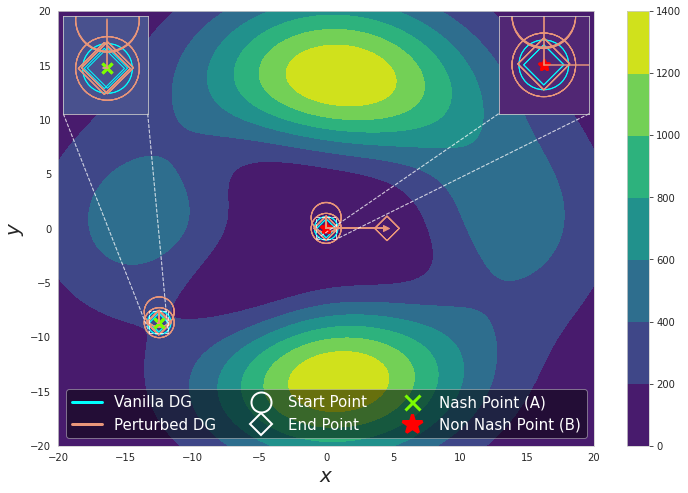

<function matplotlib.pyplot.show(close=None, block=None)>

In [17]:
import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})
sns.set_style('whitegrid')
show_contour(final_dat,init_points)
plt.show